In [1]:
##!pip install -q yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## https://blog.criesnyse.io/random-walk-theory-a-path-to-market-efficiency-or-a-misstep-288fde1e2515

In [2]:
# Download historical data for desired ticker symbol
ticker = 'AAPL'
ticker_data = yf.download(ticker, start='2019-01-01', end='2024-01-01')
# Calculate the daily returns
ticker_data['Return'] = ticker_data['Close'].pct_change()
ticker_data['Return2'] = ticker_data['Close'].diff()
# Drop missing values
ticker_data = ticker_data.dropna()
# Display the first few rows of the data
ticker_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return,Return2
Date,,,,,,,,
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163822,365248800,-0.099607,-3.932499
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622253,234428400,0.042689,1.517498
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542973,219111200,-0.002226,-0.082500
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220528,164101200,0.019063,0.705002
2019-01-09,37.822498,38.632500,37.407501,38.327499,36.835613,180396400,0.016982,0.639999


In [12]:
(37.064999-35.54750)

1.5174990000000008

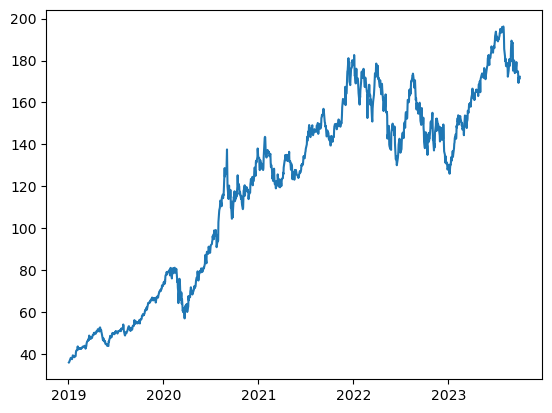

In [5]:
plt.plot(ticker_data.index,ticker_data['Open'])
#ticker_data.index

/home/ah/anaconda3/envs/rw/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ah/anaconda3/envs/rw/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


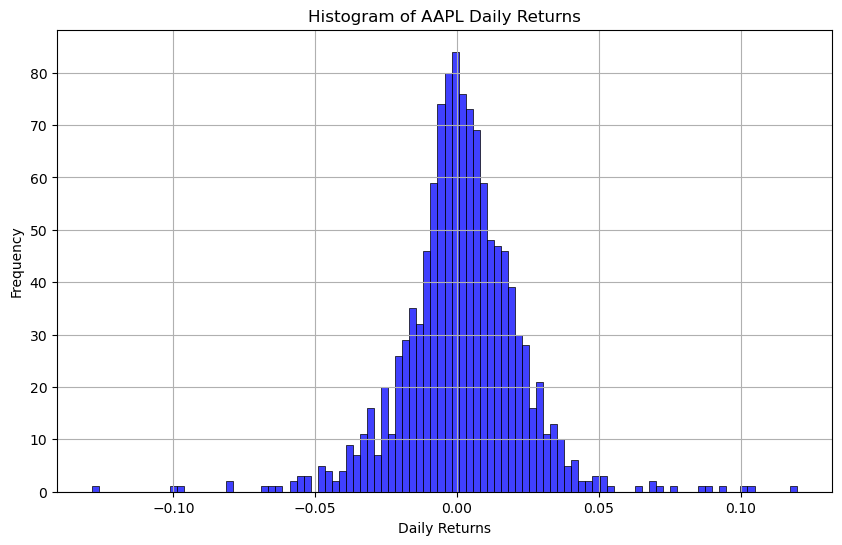

In [3]:
# Plot the histogram of the daily returns
plt.figure(figsize=(10, 6))
sns.histplot(ticker_data['Return'], kde=False, bins=100, color='blue')
plt.title('Histogram of AAPL Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/home/ah/anaconda3/envs/rw/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ah/anaconda3/envs/rw/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


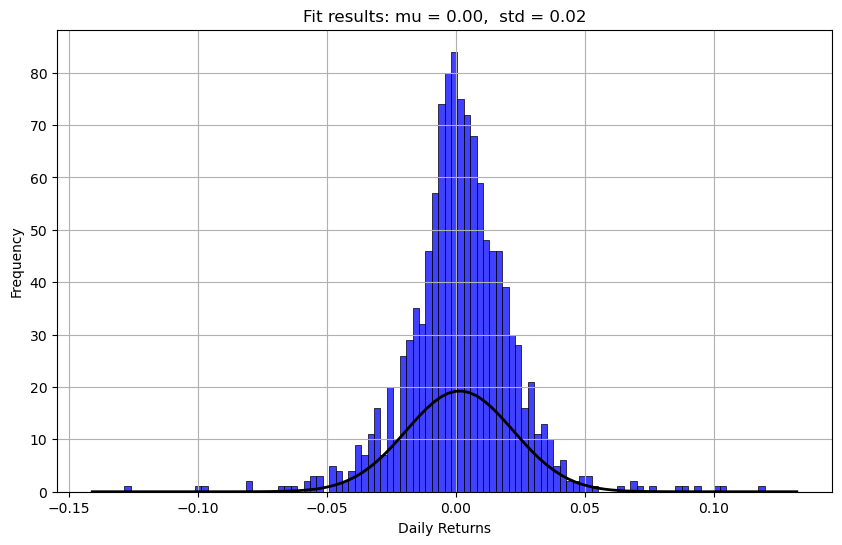

In [7]:
# Calculate the mean and standard deviation of the returns
mu, std = norm.fit(ticker_data['Return'])
# Plot the histogram again along with the normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(ticker_data['Return'], kde=False, bins=100, color='blue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, std))
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/home/ah/anaconda3/envs/rw/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ah/anaconda3/envs/rw/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


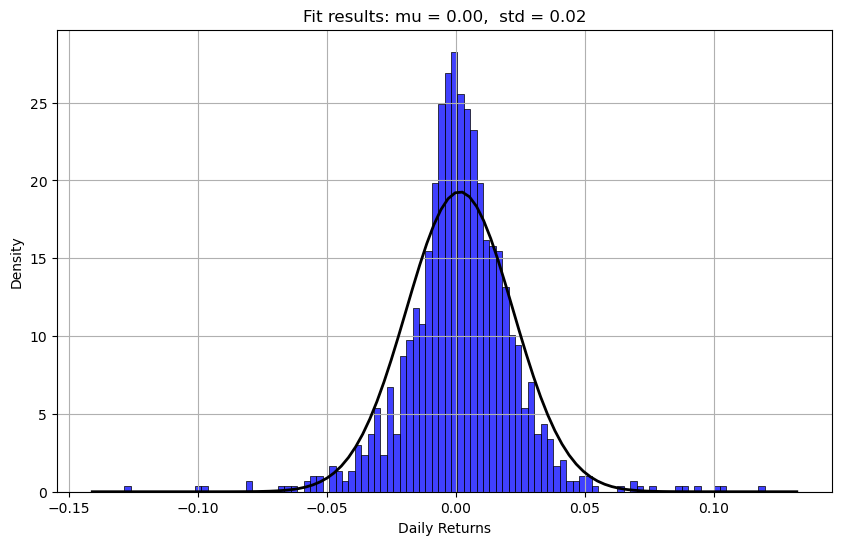

In [7]:
# Calculate the mean and standard deviation of the returns
mu, std = norm.fit(ticker_data['Return'])
# Plot the histogram again along with the normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(ticker_data['Return'], kde=False, bins=100, color='blue', stat='density')  # 'density'
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, std))
plt.xlabel('Daily Returns')
plt.ylabel('Density')  # Change Y to 'Density'
plt.grid(True)
plt.show()
